In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nproc

2


In [4]:
# Para crear procesos
import os

# Para trabajar con arrelgos numpy, una herramienta potente para todo lo que es 
# calculo numerico
import numpy as np 

#Para graficar
import matplotlib.pyplot as plt

# Para trabajar con datasets, se usa mucho para analisis de datos
import pandas as pd

In [5]:
def plot(ths, time, std, filtro):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance ' + filtro + ' multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [1]:
! unzip "/content/drive/My Drive/tp2-IMAGINE.zip"

Archive:  /content/drive/My Drive/tp2-IMAGINE.zip
replace tp2-IMAGINE/.git/ORIG_HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: tp2-IMAGINE/.git/ORIG_HEAD  
  inflating: tp2-IMAGINE/.git/config  
  inflating: tp2-IMAGINE/.git/hooks/fsmonitor-watchman.sample  
  inflating: tp2-IMAGINE/.git/hooks/commit-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-rebase.sample  
  inflating: tp2-IMAGINE/.git/hooks/prepare-commit-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-applypatch.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-commit.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-push.sample  
  inflating: tp2-IMAGINE/.git/hooks/update.sample  
  inflating: tp2-IMAGINE/.git/hooks/applypatch-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-merge-commit.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-receive.sample  
  inflating: tp2-IMAGINE/.git/hooks/post-update.sample  
  inflating: tp2-IMAGINE/.git/info/exclude  
  inflating: tp2-IMAGINE/.git/description  
  infl

In [6]:
! cd tp2-IMAGINE/src/;make

make: Nothing to be done for 'all'.


Los filtros elegidos para la experimentación fueron los de brightness y boxblur. Ambos fueron elegidos en base a la complejidad de sus algoritmos, pensando que la utilización de varios threads en brightness no cambiaría mucho el tiempo (esperamos una pequeña mejoría), debido a que se trata de un algoritmo, dentro de todo, sencillo. Mientras que esperamos que boxblur mejore su tiempo de ejecución con más threads debido a que es un algoritmo más "complejo".


In [7]:
#PRUEBA BRIGHTNESS TOTORO
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/totoro.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


,Width,Time,Threads
0,989,0.053377,1
1,989,0.039574,2
2,989,0.033959,3
3,989,0.038235,4
4,989,0.029141,5
5,989,0.043838,6
6,989,0.033996,7
7,989,0.036443,8
8,989,0.037990,9
9,989,0.030642,10


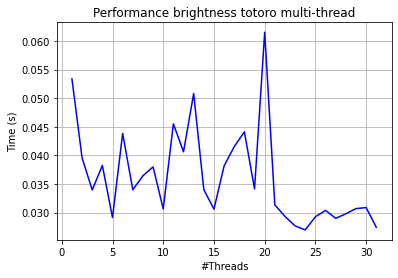

In [8]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness totoro')

In [9]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,989,0.025709,1
1,989,0.025603,1
2,989,0.026285,1
3,989,0.028637,1
4,989,0.027836,1
...,...,...,...
615,989,0.029910,31
616,989,0.029810,31
617,989,0.026801,31
618,989,0.030614,31


In [10]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.026180
2     0.023309
3     0.023659
4     0.023777
5     0.024277
6     0.024331
7     0.025303
8     0.026082
9     0.026544
10    0.025198
11    0.025015
12    0.025884
13    0.025650
14    0.026178
15    0.026937
16    0.025888
17    0.026828
18    0.026427
19    0.026638
20    0.026990
21    0.027225
22    0.028866
23    0.027524
24    0.029194
25    0.028728
26    0.030049
27    0.038003
28    0.034332
29    0.030783
30    0.028332
31    0.029074
Name: Time, dtype: float64

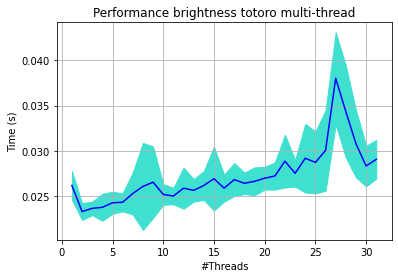

Ganancia maxima: 38.665249219790226 %


In [11]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'brightness totoro' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BRIGHTNESS TOTORO

Tomando a Totoro que es una imagen grande(989px) y aplicando multithread creímos que el tiempo iba a disminuir en comparacion con el singlethread pero esto solo se dio en el caso de los primeros 10 threads, de ahí en adelante el tiempo promedio aumentaba a medida que los thread aumentaban.

In [12]:
#PRUEBA BOXBLUR TOTORO
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/totoro.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


,Width,Time,Threads
0,987,0.155354,1
1,987,0.200845,2
2,987,0.274368,3
3,987,0.323707,4
4,987,0.376133,5
5,987,0.431292,6
6,987,0.508070,7
7,987,0.551526,8
8,987,0.620221,9
9,987,0.675560,10


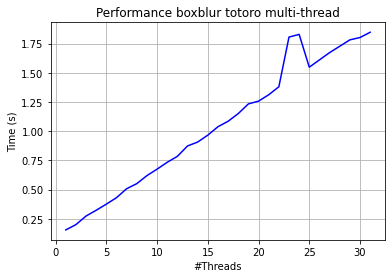

In [13]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'boxblur totoro')

In [14]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,987,0.147725,1
1,987,0.152011,1
2,987,0.160066,1
3,987,0.152366,1
4,987,0.148156,1
...,...,...,...
615,987,1.867641,31
616,987,1.871929,31
617,987,1.865760,31
618,987,1.849922,31


In [15]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.152182
2     0.204127
3     0.312400
4     0.315482
5     0.371860
6     0.450222
7     0.497008
8     0.704889
9     0.610274
10    0.667508
11    0.729385
12    0.792069
13    0.847648
14    0.909353
15    0.973728
16    1.110470
17    1.077176
18    1.147504
19    1.207482
20    1.260491
21    1.304396
22    1.475270
23    1.619406
24    1.518194
25    1.623415
26    1.656590
27    1.696366
28    1.822192
29    1.801913
30    1.980962
31    1.887516
Name: Time, dtype: float64

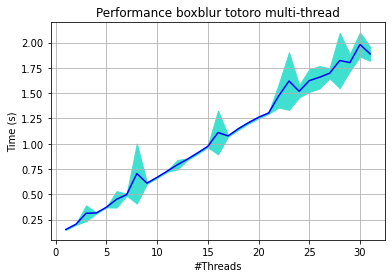

Ganancia maxima: 92.31776880150038 %


In [16]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'boxblur totoro' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR TOTORO

Volviendo a usar la imagen de Totoro pero aplicandole boxblur nos llevamos la sorpresa de que el tiempo aumentaba a medida que aumentaban los threads, sin llegar a superar la performance del single thread. **Creemos** que el tiempo en el que se aplica el filtro es mas o menos el mismo, pero el tiempo total va aumentando de manera casi lineal, por la creación de threads.

In [17]:
#PRUEBA BRIGHTNESS HOUSE
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/house_1.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]



,Width,Time,Threads
0,111,0.001203,1
1,111,0.001129,2
2,111,0.001544,3
3,111,0.002062,4
4,111,0.002186,5
5,111,0.002127,6
6,111,0.002806,7
7,111,0.004255,8
8,111,0.003264,9
9,111,0.004060,10


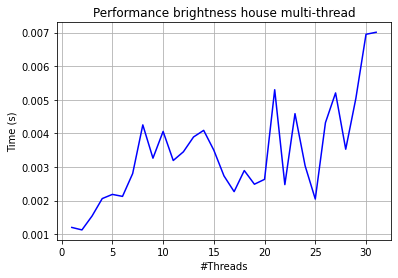

In [18]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness house')

In [19]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0 imgs/house_1.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,111,0.000880,1
1,111,0.001130,1
2,111,0.001159,1
3,111,0.001174,1
4,111,0.001112,1
...,...,...,...
615,111,0.006048,31
616,111,0.006157,31
617,111,0.005546,31
618,111,0.007766,31


In [20]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.001136
2     0.001329
3     0.001685
4     0.001739
5     0.002177
6     0.002398
7     0.002480
8     0.002509
9     0.003042
10    0.003221
11    0.002904
12    0.003893
13    0.003906
14    0.003821
15    0.004328
16    0.004526
17    0.004950
18    0.004547
19    0.003968
20    0.004943
21    0.005367
22    0.003720
23    0.005569
24    0.004032
25    0.002849
26    0.004945
27    0.005346
28    0.002686
29    0.002545
30    0.004687
31    0.005944
Name: Time, dtype: float64

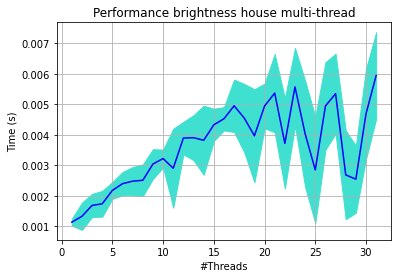

Ganancia maxima: 80.89104996172321 %


In [21]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'brightness house' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BRIGHTNESS HOUSE

Al intentar el experimento con una imagen más chica, house_1(111px), podemos ver que el tiempo promedio es menor ya que hay menos pixeles sobre los que aplicar el filtro, pero al hacerlo multithread podemos ver que el tiempo máximo es cuatro veces más que el timepo en single thread, ya que estamos creando threads que se van a ocupar de muy poca cantidad de pixeles, entonces va a ser mayor el costo de tiempo para crearlos que la mejoría en la ejecución.

In [22]:
#PRUEBA BOXBLUR HOUSE
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0.5 imgs/house_1.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]



,Width,Time,Threads
0,109,0.004309,1
1,109,0.004851,2
2,109,0.006360,3
3,109,0.007462,4
4,109,0.009329,5
5,109,0.010379,6
6,109,0.011707,7
7,109,0.012949,8
8,109,0.014881,9
9,109,0.019859,10


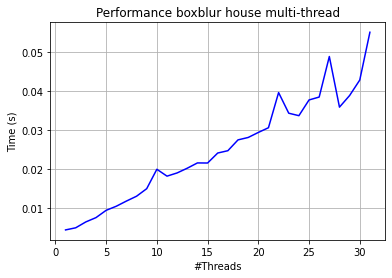

In [23]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'boxblur house')

In [24]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/house_1.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,109,0.004323,1
1,109,0.003632,1
2,109,0.003597,1
3,109,0.004098,1
4,109,0.005480,1
...,...,...,...
615,109,0.040172,31
616,109,0.053780,31
617,109,0.043176,31
618,109,0.043047,31


In [25]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.003910
2     0.005578
3     0.006778
4     0.007907
5     0.009466
6     0.010686
7     0.012511
8     0.013536
9     0.014843
10    0.016206
11    0.018355
12    0.019801
13    0.020330
14    0.021847
15    0.022585
16    0.024181
17    0.024655
18    0.028106
19    0.026389
20    0.028875
21    0.031002
22    0.034381
23    0.031643
24    0.033984
25    0.036851
26    0.039717
27    0.034722
28    0.036737
29    0.039999
30    0.041368
31    0.043688
Name: Time, dtype: float64

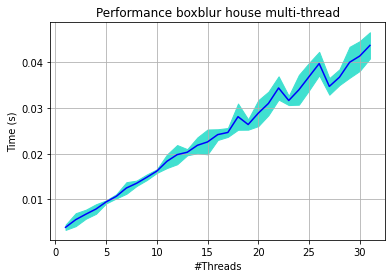

Ganancia maxima: 91.05035164319517 %


In [26]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'boxblur house' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR HOUSE

En boxblur se mantiene el aumento de tiempo de manera lineal, podemos ver que la ganancia maxima es similar en comparación con la foto de Totoro.

¿Cuán determinante es la configuración de hardware donde se corren los experimentos y como
puede relacionarse con lo observado?

La configuración del hardware se relaciona con el experimento ya que estamos intentando la paralelización de tareas y esto solo sería optimo hasta cierto punto, en donde deberíamos tener la misma cantidad de nucleos lógicos que tareas, en el caso de que las tareas fuesen más, estas dejarían de ejecutarse de forma paralela y se ejecutarían de forma concurrente, por ende ya no convendría paralelizar tanto por l tiempo que sumaría la concurrencia.

¿Hay diferencias de performance para los distintos tipos de filtros Multi-thread?

Sí, hay diferencia de performance, y esto se puede ver en nuestros ejemplos, que serían brightness y boxblur, en el grafico de brightness podemos observar como en algunas corridas de multithread la performance mejora, haciendo que el gráfico se vea más variable, mientras que el gráfico de boxblur es más lineal, lo que significa que cuantos más threads se hagan, por es la performance.

En base a lo visto, ¿siempre es conveniente paralelizar? ¿De qué factores de la entrada depende
esto?

En base a lo visto, no, no siempre es conveniente paralelizar, y depende, por ejemplo, del tamaño de las imágenes y los filtros elegidos. Entonces, lo que podemos decir es que, a veces no es conveniente paralelizar el aplicado de filtros de una imagen, como por ejemplo con el filtro boxblur, en el cual si se hace multithread la performance empeora notablemente, así como tampoco conviene utilizar varios threads para aplicar un filtro en una imagen muy pequeña, porque se tarda más en crear los threads a que estos apliquen el filtro a las imágenes. En cambio, por ejemplo, podemos ver que en la imagen de Totoro con la aplicación del filtro brightness, con una cierta cantidad de threads, la performance mejora.

In [2]:
! cd tp2-IMAGINE/src/Directorios/;make

g++ -Wall -Wpedantic -g -pthread -o loader loader.o ../filters.o ../ppm.o ../helper.o


In [6]:
#PRUEBA BRIGHTNESS LOADER
! rm tp2-IMAGINE/src/Directorios/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/Directorios/; "
  cmd += "./loader brightness " + str(n_threads) +  " 0.5 ../imgs/ out_dir/ 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/src/Directorios/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


rm: cannot remove 'tp2-IMAGINE/src/Directorios/pruebas/resultados.csv': No such file or directory


,Width,Time,Threads
0,10302,1.542833,1
1,10302,1.485376,2
2,10302,1.509843,3
3,10302,1.484998,4
4,10302,1.502043,5
5,10302,1.529224,6
6,10302,1.501598,7
7,10302,1.523659,8
8,10302,1.505045,9
9,10302,1.526582,10


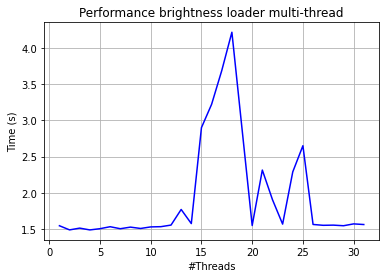

In [7]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness loader')

In [8]:
! rm tp2-IMAGINE/src/Directorios/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/Directorios/; "
  cmd += "./loader brightness " + str(n_threads) +  " 0.5 ../imgs/ out_dir/ 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/src/Directorios/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,10302,1.529635,1
1,10302,1.505973,1
2,10302,1.524671,1
3,10302,1.500968,1
4,10302,1.470235,1
...,...,...,...
615,10302,1.575702,31
616,10302,1.567282,31
617,10302,1.587115,31
618,10302,1.558387,31


In [9]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     1.498660
2     1.484379
3     1.544005
4     1.479799
5     1.476562
6     1.620724
7     1.495278
8     1.709768
9     1.502929
10    1.502218
11    1.529033
12    1.621908
13    1.525204
14    1.523286
15    1.527336
16    1.527710
17    1.609843
18    1.532627
19    1.524339
20    1.529138
21    1.540162
22    1.580871
23    1.643169
24    1.969943
25    1.544674
26    1.555452
27    2.032876
28    1.672516
29    1.591581
30    1.615357
31    1.569862
Name: Time, dtype: float64

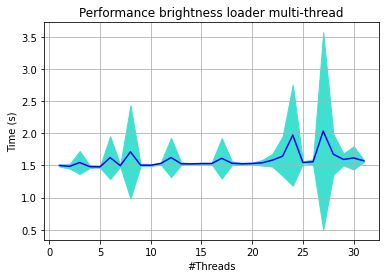

Ganancia maxima: 27.365866906615683 %


In [10]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'brightness loader' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA brightness loader

Aplicando el filtro brightness al directorio que contiene 13 imágenes, podemos ver que de single thread a 10 threads, la performance mejora en comparación a single thread, pero a partir de 11 threads en adelante, la performance empeora. Podemos concluir que no conviene paralelizr este lote con el filtro brightness porque la mejora es mínima.

In [11]:
! cd tp2-IMAGINE/src/imgs/; cp cebra.ppm menosFotos/cebra.ppm
! cd tp2-IMAGINE/src/imgs/; cp house_1.ppm menosFotos/house_1.ppm
! cd tp2-IMAGINE/src/imgs/; cp totoro.ppm menosFotos/totoro.ppm

In [12]:
#PRUEBA BRIGHTNESS LOADER menos fotos
! rm tp2-IMAGINE/src/Directorios/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/Directorios/; "
  cmd += "./loader brightness " + str(n_threads) +  " 0.5 ../imgs/menosFotos/ out_dir/ 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/src/Directorios/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


,Width,Time,Threads
0,1900,0.258765,1
1,1900,0.259791,2
2,1900,0.270918,3
3,1900,0.267867,4
4,1900,0.255334,5
5,1900,0.251511,6
6,1900,0.286772,7
7,1900,0.246765,8
8,1900,0.255677,9
9,1900,0.253500,10


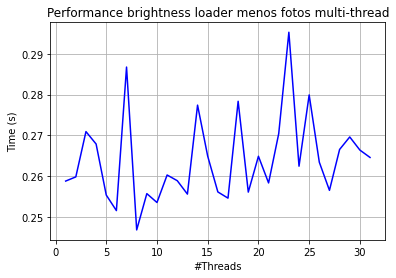

In [13]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness loader menos fotos')

In [14]:
! rm tp2-IMAGINE/src/Directorios/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/Directorios/; "
  cmd += "./loader brightness " + str(n_threads) +  " 0.5 ../imgs/menosFotos/ out_dir/ 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/src/Directorios/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,1900,0.259541,1
1,1900,0.248239,1
2,1900,0.260862,1
3,1900,0.272448,1
4,1900,0.264128,1
...,...,...,...
615,1900,0.272737,31
616,1900,0.281826,31
617,1900,0.262939,31
618,1900,0.264099,31


In [15]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.262125
2     0.255003
3     0.255389
4     0.256282
5     0.254558
6     0.253422
7     0.252339
8     0.256631
9     0.349979
10    0.253345
11    0.254556
12    0.255272
13    0.259744
14    0.256653
15    0.263216
16    0.260913
17    0.264195
18    0.263884
19    0.264440
20    0.261046
21    0.263320
22    0.264082
23    0.265358
24    0.265235
25    0.292434
26    0.263992
27    0.267298
28    0.268223
29    0.270492
30    0.267235
31    0.268131
Name: Time, dtype: float64

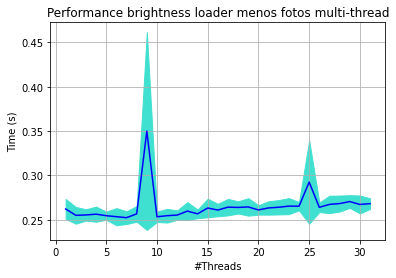

Ganancia maxima: 27.8988460319159 %


In [16]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'brightness loader menos fotos' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA brightness loader menos fotos

En una prueba con una carpeta que contiene menos fotos, solo 3, tampoco conviene mucho la paralelización y la ganancia es mínima.